# NSD Thresholds

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

from htc.settings_seg import settings_seg

pio.kaleido.scope.mathjax = None

In [2]:
df_thresholds = pd.read_csv(settings_seg.nsd_tolerances_path)
df_thresholds

,label_name,label_index,tolerance_mean,tolerance_mean_std,tolerance_median,tolerance_median_std,tolerance_q75,tolerance_q75_std,tolerance_q95,tolerance_q95_std
0,background,0,2.163772,0.000000,1.414214,0.000000,2.000000,0.000000,9.704048,0.000000
1,heart,1,12.253547,9.326841,2.000000,0.000000,3.914214,1.085786,56.358709,43.630787
2,lung,2,4.725244,1.315539,1.207107,0.207107,2.414214,0.414214,30.473800,10.324404
3,liver,3,1.408243,0.424091,1.076923,0.474186,1.960406,0.622556,4.087531,1.435731
4,colon,4,5.319908,9.038581,0.785714,0.673856,2.911164,4.152037,34.995176,65.584369
5,small_bowel,5,2.185947,1.716667,0.911901,0.473279,1.821436,0.636077,11.257566,13.712820
6,stomach,6,5.409232,8.760680,1.686887,0.698389,8.056732,17.016703,19.832895,27.412320
7,spleen,7,1.673189,1.516059,1.037656,0.119078,1.663688,0.481813,6.340483,10.479266
8,gallbladder,8,1.248512,0.617641,1.138071,0.195262,1.466395,0.545026,3.372721,2.594796
9,bladder,9,1.126835,0.433350,0.800000,0.400000,1.482843,0.448528,3.695742,2.709519


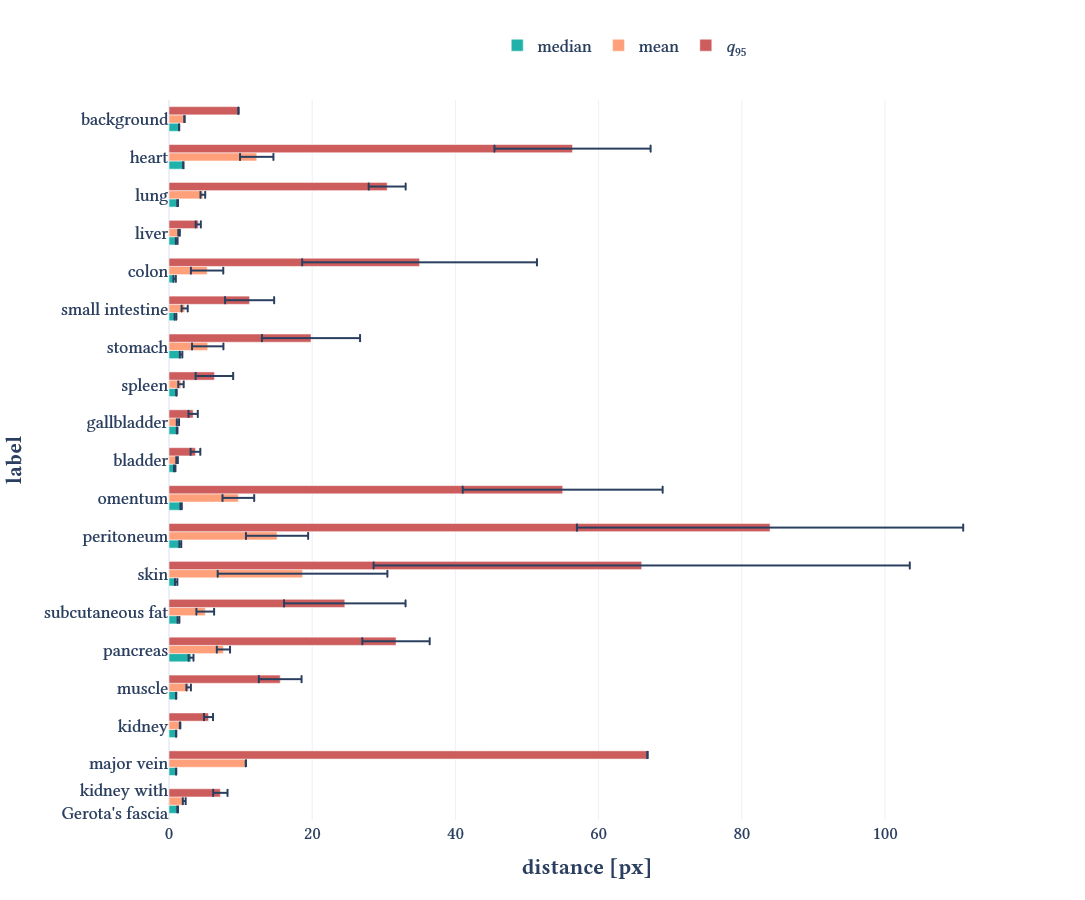

In [3]:
fig = go.Figure()

labels = list(reversed(df_thresholds["label_name"].tolist()))
labels_plotly = [settings_seg.labels_paper_renaming.get(l, l) for l in labels]

legend_name = {
    "tolerance_mean": "mean",
    "tolerance_median": "median",
    "tolerance_q75": "<i>q</i><sub>75</sub>",
    "tolerance_q95": "<i>q</i><sub>95</sub>",
}
colors = {
    "tolerance_mean": "lightsalmon",
    "tolerance_median": "lightseagreen",
    "tolerance_q75": "indianred",
    "tolerance_q95": "indianred",
}

for name in ["tolerance_median", "tolerance_mean", "tolerance_q95"]:
    values = [df_thresholds.query("label_name == @l")[name].item() for l in labels]
    std = [df_thresholds.query("label_name == @l")[f"{name}_std"].item() * 0.25 for l in labels]
    fig.add_trace(
        go.Bar(
            y=labels_plotly,
            x=values,
            error_x=dict(type="data", array=std),
            name=legend_name[name],
            orientation="h",
            marker_color=colors[name],
        )
    )

fig.update_layout(barmode="group", bargap=0.35)
fig.update_layout(yaxis_title="<b>label</b>", xaxis_title="<b>distance [px]</b>", height=600)
fig.update_layout(template="plotly_white", font_family="Libertinus Serif", font_size=18)
fig.update_layout(height=900, width=700)
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=0.70))
fig.write_image(settings_seg.paper_dir / "nsd_thresholds.pdf")
fig.show()